# Audience Conversion Propensity Modeling

## Objective
Build a supervised machine learning model to estimate the probability that an ad-exposed audience cohort will convert within the next 7 days, using aggregated exposure, engagement, and contextual signals.

## Why This Matters
The model helps prioritize high-intent audience segments and enables more efficient allocation of advertising budget.

## Data Level
Cohort-level, privacy-safe, aggregated data (no user-level identifiers).



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [52]:
df=pd.read_excel(r"C:\Users\bhara\OneDrive\Desktop\INTERVIEW PREPS\ML PROJECT 1\Audience-Conversion-Propensity\notebooks\data\raw\cohort_conversion_dataset.xlsx")

In [50]:
df.head()

,as_of_date,audience_segment,product_category,geo,device,users_exposed,impressions_7d,avg_frequency_7d,recency_hours,clicks_7d,ctr_7d,site_visits_7d,product_views_7d,add_to_cart_7d,avg_session_time_sec,prev_conv_rate_28d,seasonality_index,converters_7d,conversion_rate_7d
0,2024-05-09,Luxury Shoppers,Luxury,IN,Mobile,59343,209989,3.8,86,1574,0.0075,7613,3807,679,250,0.041,1.08,3319,0.0559
1,2024-03-04,Casual Browsers,Books,IN,Mobile,24769,85511,3.5,52,1549,0.0181,7124,2949,1016,166,0.047,1.05,1136,0.0459
2,2024-01-08,Book Lovers,Books,UK,Desktop,46606,80848,1.9,7,2308,0.0285,12124,6251,957,166,0.076,1.07,4040,0.0867
3,2024-01-15,Luxury Shoppers,Luxury,UK,Desktop,31531,66282,2.0,9,675,0.0102,3557,1456,463,209,0.105,1.13,4251,0.1348
4,2024-01-09,Casual Browsers,Books,US,Mobile,6016,34081,5.3,85,630,0.0185,3368,2322,630,175,0.086,0.94,344,0.0572


Doing EDA on dataset

In [ ]:
print("No:of columns=",df.shape[1])
print("No:of rows=",df.shape[0])

No:of columns= 19
No:of rows= 5000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   as_of_date            5000 non-null   datetime64[ns]
 1   audience_segment      5000 non-null   object        
 2   product_category      5000 non-null   object        
 3   geo                   5000 non-null   object        
 4   device                5000 non-null   object        
 5   users_exposed         5000 non-null   int64         
 6   impressions_7d        5000 non-null   int64         
 7   avg_frequency_7d      5000 non-null   float64       
 8   recency_hours         5000 non-null   int64         
 9   clicks_7d             5000 non-null   int64         
 10  ctr_7d                5000 non-null   float64       
 11  site_visits_7d        5000 non-null   int64         
 12  product_views_7d      5000 non-null   int64         
 13  add_to_cart_7d    

In [31]:
df.isna().sum()

as_of_date              0
audience_segment        0
product_category        0
geo                     0
device                  0
users_exposed           0
impressions_7d          0
avg_frequency_7d        0
recency_hours           0
clicks_7d               0
ctr_7d                  0
site_visits_7d          0
product_views_7d        0
add_to_cart_7d          0
avg_session_time_sec    0
prev_conv_rate_28d      0
seasonality_index       0
converters_7d           0
conversion_rate_7d      0
dtype: int64

There are no null values in the dataset

In [44]:
df.describe()

,as_of_date,users_exposed,impressions_7d,avg_frequency_7d,recency_hours,clicks_7d,ctr_7d,site_visits_7d,product_views_7d,add_to_cart_7d,avg_session_time_sec,prev_conv_rate_28d,seasonality_index,converters_7d,conversion_rate_7d
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2024-03-30 22:18:54.720000,32177.535800,108378.566800,3.353380,49.028600,1874.065400,0.017379,9325.305000,5133.822600,1290.650200,219.79380,0.124643,1.025136,4083.246200,0.127675
min,2024-01-01 00:00:00,5013.000000,6976.000000,1.200000,4.000000,53.000000,0.005000,228.000000,96.000000,24.000000,120.00000,0.030000,0.900000,118.000000,0.021800
25%,2024-02-15 00:00:00,18489.250000,51748.750000,2.300000,26.000000,745.000000,0.011000,3467.750000,1878.500000,447.750000,170.00000,0.078000,0.960000,1796.000000,0.076200
50%,2024-03-31 00:00:00,31779.500000,92512.500000,3.400000,49.000000,1447.500000,0.017350,6927.000000,3700.500000,911.000000,220.00000,0.124000,1.030000,3353.500000,0.123050
75%,2024-05-15 06:00:00,45708.000000,151948.750000,4.400000,72.000000,2552.000000,0.023700,12844.250000,6994.500000,1707.500000,269.00000,0.172250,1.090000,5763.250000,0.172500
max,2024-06-28 00:00:00,59995.000000,344747.000000,5.500000,95.000000,9322.000000,0.030000,56145.000000,34142.000000,9950.000000,319.00000,0.220000,1.150000,16630.000000,0.313500
std,NaN,15707.226248,70272.812548,1.249983,26.600626,1517.390564,0.007245,8004.124117,4575.968385,1215.261132,57.36451,0.054869,0.072220,2919.147808,0.061288


In [39]:
print(f" The dataset has the data from {df["as_of_date"].min() } to {df["as_of_date"].max() } ")

 The dataset has the data from 2024-01-01 00:00:00 to 2024-06-28 00:00:00 


In [40]:
df.columns

Index(['as_of_date', 'audience_segment', 'product_category', 'geo', 'device',
       'users_exposed', 'impressions_7d', 'avg_frequency_7d', 'recency_hours',
       'clicks_7d', 'ctr_7d', 'site_visits_7d', 'product_views_7d',
       'add_to_cart_7d', 'avg_session_time_sec', 'prev_conv_rate_28d',
       'seasonality_index', 'converters_7d', 'conversion_rate_7d'],
      dtype='object')

In [46]:
df['geo'].unique()

array(['IN', 'UK', 'US'], dtype=object)

In [47]:
df['audience_segment'].unique()

array(['Luxury Shoppers', 'Casual Browsers', 'Book Lovers', 'New Parents',
       'Fitness Enthusiasts', 'Tech Shoppers', 'Deal Seekers',
       'Beauty Buyers'], dtype=object)

In [48]:
df['product_category'].unique()

array(['Luxury', 'Books', 'Baby Care', 'Fitness App', 'Electronics',
       'Retail', 'Beauty'], dtype=object)

The dataset has the data for India ,UK and US

target variable analysis

In [42]:
df["conversion_rate_7d"].describe()

count    5000.000000
mean        0.127675
std         0.061288
min         0.021800
25%         0.076200
50%         0.123050
75%         0.172500
max         0.313500
Name: conversion_rate_7d, dtype: float64

<Axes: xlabel='conversion_rate_7d', ylabel='Count'>

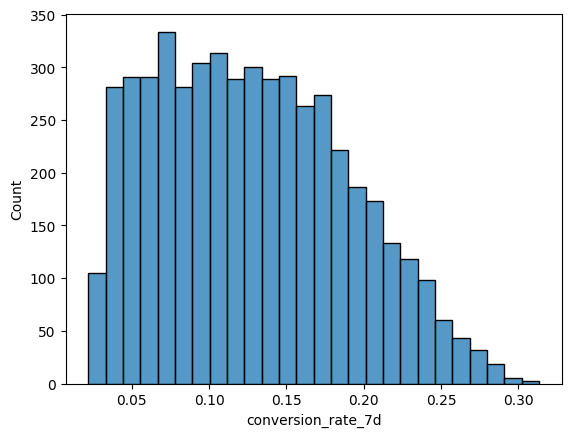

In [45]:
sns.histplot(df['conversion_rate_7d'])

<Axes: ylabel='converters_7d'>

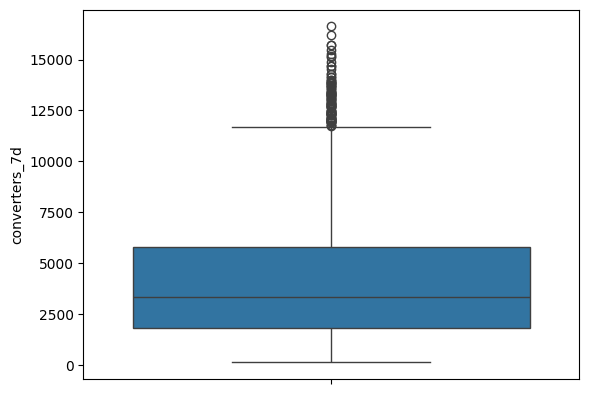

In [49]:
sns.boxplot(df['converters_7d'])

In [53]:
print("Min conversion rate:", df["conversion_rate_7d"].min())
print("Max conversion rate:", df["conversion_rate_7d"].max())

print("Any conversion_rate > 1:", (df["conversion_rate_7d"] > 1).sum())
print("Any negative conversion_rate:", (df["conversion_rate_7d"] < 0).sum())


Min conversion rate: 0.0218
Max conversion rate: 0.3135
Any conversion_rate > 1: 0
Any negative conversion_rate: 0


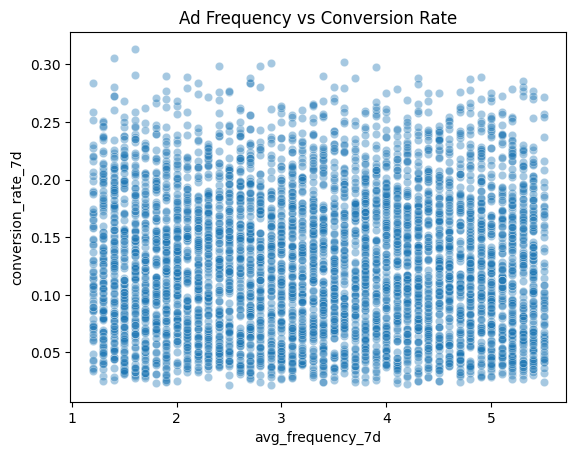

In [54]:
sns.scatterplot(
    x="avg_frequency_7d",
    y="conversion_rate_7d",
    data=df,
    alpha=0.4
)
plt.title("Ad Frequency vs Conversion Rate")
plt.show()


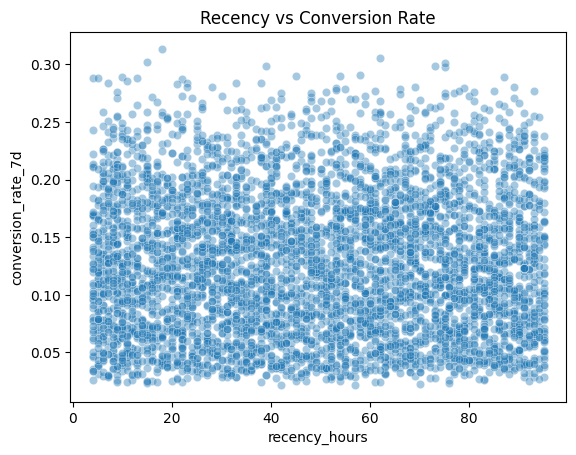

In [55]:
sns.scatterplot(
    x="recency_hours",
    y="conversion_rate_7d",
    data=df,
    alpha=0.4
)
plt.title("Recency vs Conversion Rate")
plt.show()


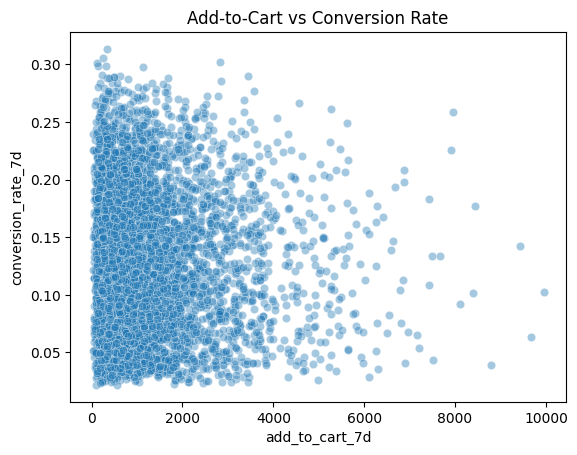

In [56]:
sns.scatterplot(
    x="add_to_cart_7d",
    y="conversion_rate_7d",
    data=df,
    alpha=0.4
)
plt.title("Add-to-Cart vs Conversion Rate")
plt.show()


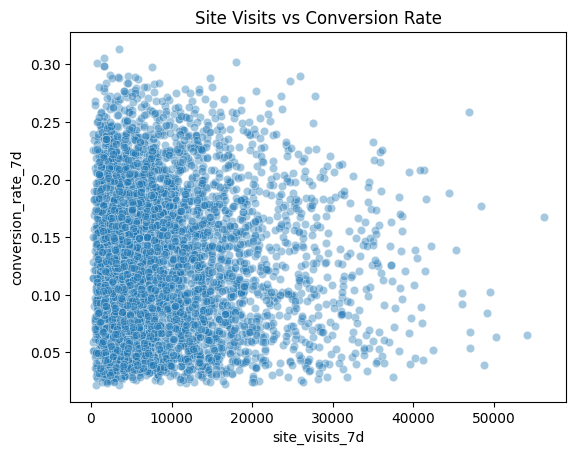

In [57]:
sns.scatterplot(
    x="site_visits_7d",
    y="conversion_rate_7d",
    data=df,
    alpha=0.4
)
plt.title("Site Visits vs Conversion Rate")
plt.show()


In [58]:
df.groupby("audience_segment")["conversion_rate_7d"].mean().sort_values(ascending=False)


audience_segment
Luxury Shoppers        0.133802
Tech Shoppers          0.131152
New Parents            0.129521
Deal Seekers           0.128474
Fitness Enthusiasts    0.127017
Book Lovers            0.125284
Beauty Buyers          0.123816
Casual Browsers        0.122732
Name: conversion_rate_7d, dtype: float64

In [59]:
df.groupby("product_category")["conversion_rate_7d"].mean().sort_values(ascending=False)


product_category
Luxury         0.133802
Electronics    0.131152
Baby Care      0.129521
Retail         0.128474
Fitness App    0.127017
Books          0.123992
Beauty         0.123816
Name: conversion_rate_7d, dtype: float64

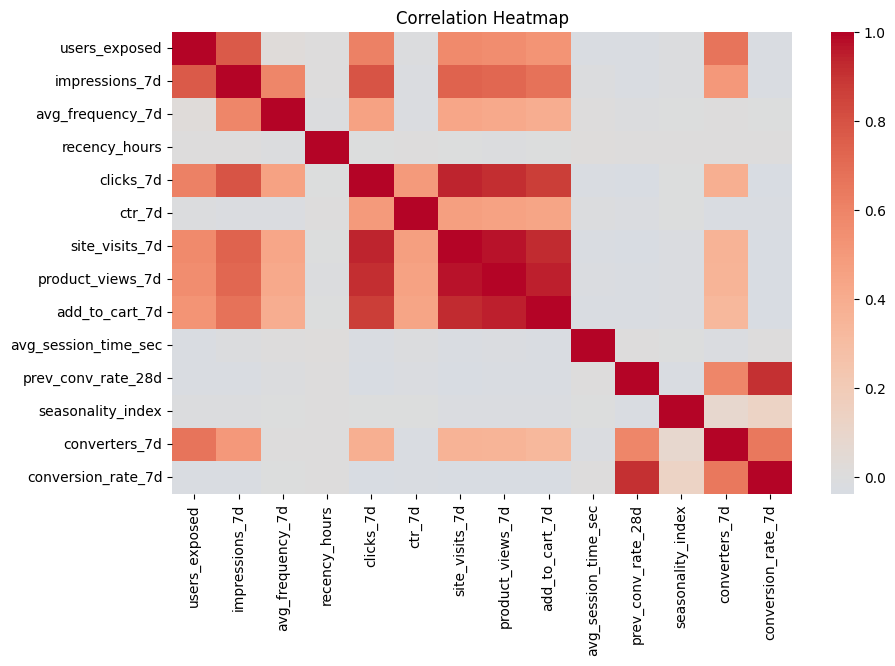

In [60]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()
